In [6]:
# lstm autoencoder recreate sequence
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model

In [7]:
# define input sequence
sequence = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
# reshape input into [samples, timesteps, features]
n_in = len(sequence)
sequence = sequence.reshape((1, n_in, 1))

In [8]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_in,1)))
model.add(RepeatVector(n_in))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')

In [9]:
# fit model
model.fit(sequence, sequence, epochs=300, verbose=1)

Epoch 1/300
1/1 [==============================] - 0s 2ms/step - loss: 0.3065
Epoch 2/300
1/1 [==============================] - 0s 2ms/step - loss: 0.2834
Epoch 3/300
1/1 [==============================] - 0s 5ms/step - loss: 0.2612
Epoch 4/300
1/1 [==============================] - 0s 2ms/step - loss: 0.2412
Epoch 5/300
1/1 [==============================] - 0s 2ms/step - loss: 0.2223
Epoch 6/300
1/1 [==============================] - 0s 2ms/step - loss: 0.2036
Epoch 7/300
1/1 [==============================] - 0s 2ms/step - loss: 0.1844
Epoch 8/300
1/1 [==============================] - 0s 3ms/step - loss: 0.1645
Epoch 9/300
1/1 [==============================] - 0s 2ms/step - loss: 0.1438
Epoch 10/300
1/1 [==============================] - 0s 2ms/step - loss: 0.1221
Epoch 11/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0993
Epoch 12/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0759
Epoch 13/300
1/1 [==============================] - 0s 3ms/st

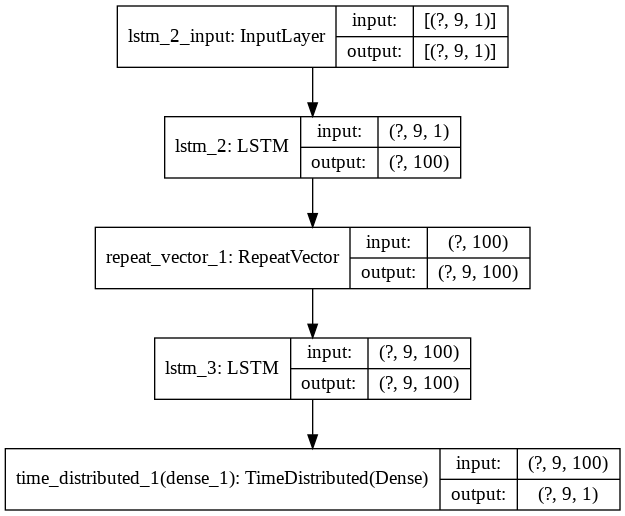

In [10]:
plot_model(model, show_shapes=True, to_file='reconstruct_lstm_autoencoder.png')

In [11]:
# demonstrate recreation
yhat = model.predict(sequence, verbose=0)
print(yhat[0,:,0])

[0.10474801 0.20122027 0.29951608 0.39916354 0.49953687 0.6001061
 0.70035475 0.8002179  0.8997594 ]
